# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [0]:
import pandas as pd

In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [105]:
attrition_data.head()
#attrition_data.shape


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


In [0]:
# Loading the Basic packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Loading the machine learning packages 
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [108]:
# finding the unique values ofdifferent features
attrition_data.Department.value_counts()
attrition_data.BusinessTravel.value_counts()
attrition_data.EducationField.value_counts()
attrition_data.JobRole.value_counts()
attrition_data.MaritalStatus.value_counts()

Married     454
Single      342
Divorced    232
Name: MaritalStatus, dtype: int64

In [109]:
# Conversion of all the features into numerical values
le = LabelEncoder() 
  
attrition_data['Department']= le.fit_transform(attrition_data['Department']) 
attrition_data['Gender']= le.fit_transform(attrition_data['Gender'])
attrition_data['MaritalStatus']= le.fit_transform(attrition_data['MaritalStatus'])
attrition_data['JobRole']= le.fit_transform(attrition_data['JobRole'])
attrition_data['BusinessTravel']= le.fit_transform(attrition_data['BusinessTravel'])
attrition_data['EducationField']= le.fit_transform(attrition_data['EducationField'])
attrition_data['OverTime']= le.fit_transform(attrition_data['OverTime'])

attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,4


In [110]:
#Checking for missing Values
attrition_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
ID        

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8bbe9999b0>,
      dtype=object)

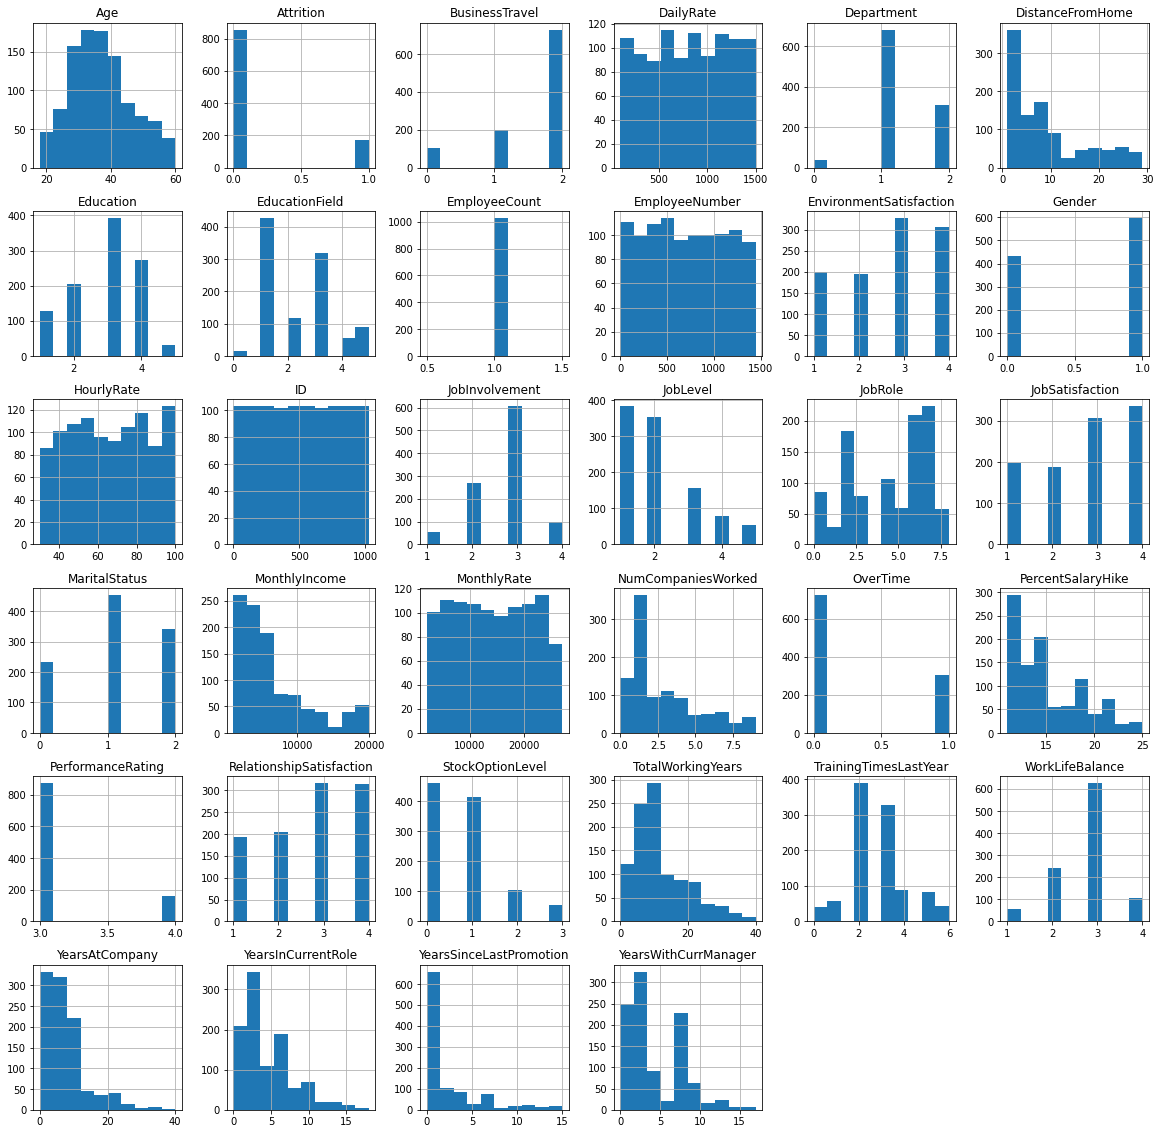

In [111]:
# Data Visualization by plotting Histogram
attrition_data.hist(figsize=(20,20))

In [0]:
# Some features can be neglected can be neglected
X =attrition_data.drop(['Attrition','MonthlyRate','ID','HourlyRate','DailyRate','EmployeeNumber'],axis=1)
y=attrition_data['Attrition']
#X.shape

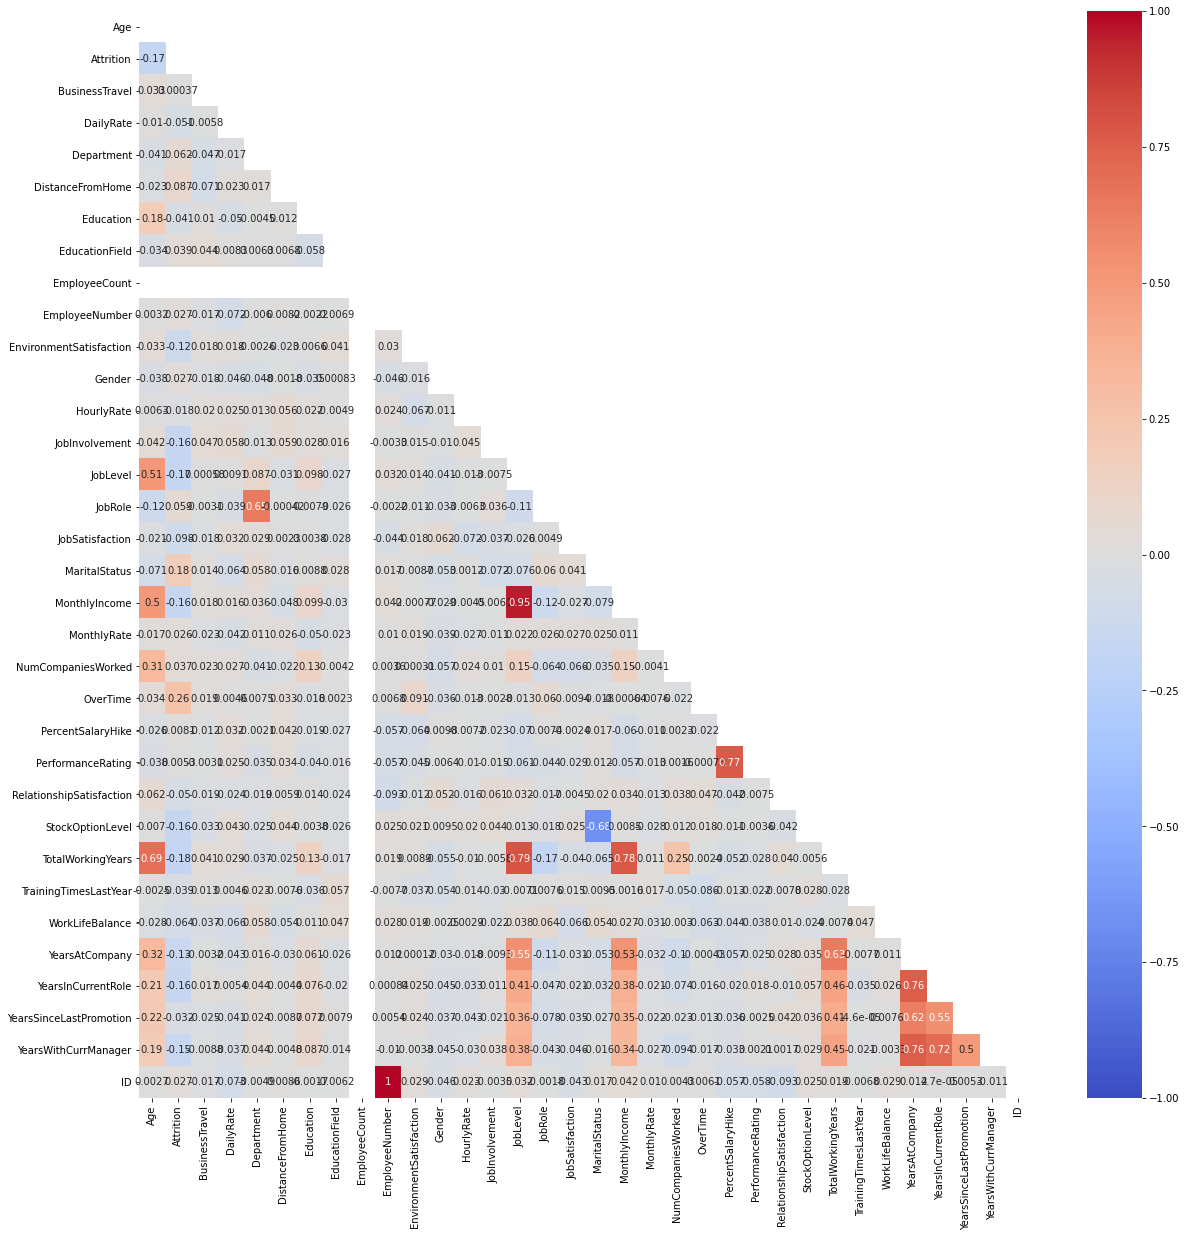

In [113]:
#Visualization of Data using Correlation Matrix
from matplotlib import pyplot as plt
plt.figure(figsize=(20,20))
mask = np.zeros_like(attrition_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(attrition_data.corr(), 
            vmin = -1,
            cmap='coolwarm',
            annot=True,
            mask=mask)
# plt.savefig('corr-matrix.png')
plt.show()

In [114]:
from sklearn import preprocessing
# Scaling the features
X.Age= preprocessing.scale(X.Age)
print("\nAfter Scaling :\n",X.Age)


After Scaling :
 0       0.423845
1       1.271330
2       0.000103
3      -0.423639
4      -1.059252
          ...   
1023    2.012878
1024    1.059459
1025   -1.377059
1026   -0.529575
1027   -0.317704
Name: Age, Length: 1028, dtype: float64


In [115]:

X.MonthlyIncome=preprocessing.scale(X.MonthlyIncome)
print("\nAfter Scaling :\n",X.MonthlyIncome)



After Scaling :
 0      -0.131779
1      -0.309593
2      -0.935960
3      -0.767212
4      -0.652034
          ...   
1023   -0.940905
1024    2.170944
1025   -0.509041
1026    0.529821
1027   -0.687886
Name: MonthlyIncome, Length: 1028, dtype: float64


In [116]:
X.PercentSalaryHike= preprocessing.scale(X.PercentSalaryHike)
print("\nAfter Scaling:\n", X.PercentSalaryHike)


After Scaling:
 0      -1.144359
1       2.147040
2      -0.047226
3      -1.144359
4      -0.870076
          ...   
1023    1.872757
1024    1.049907
1025   -0.870076
1026   -0.870076
1027    0.501341
Name: PercentSalaryHike, Length: 1028, dtype: float64


In [117]:
#Splitting Data into Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 123)
train_scores, test_scores = [],[]
for i in [5,10,15,20,25]:
  for j in [5,10,15,20,25,28]:
    rfc = RandomForestClassifier(n_estimators=i,random_state=1111,max_features=j)
    rfc.fit(X_train,y_train)
    train_prediction = rfc.predict(X_train)
    test_prediction = rfc.predict(X_test)

    train_scores.append(round(accuracy_score(y_train,train_prediction),2))
    test_scores.append(round(accuracy_score(y_test,test_prediction),2))
  
print("Training_score :{}".format(train_scores))
print("Testing_score:{}".format(test_scores))

#Instantiating The Classifier
#rfr = RandomForestRegressor(n_estimators=25,random_state=1111,max_features=25)

#fitting theInstantiator
#rfr.fit(X_train,y_train)

#Printing Training ang Testing accuracies
print('The training error is {:.2f}'.format(mean_absolute_error(y_train, rfc.predict(X_train))))
print('The testing error is {:.2f}'.format(mean_absolute_error(y_test, rfc.predict(X_test))))
#rfc.get_params()

Training_score :[0.96, 0.98, 0.97, 0.98, 0.97, 0.97, 0.99, 0.99, 0.98, 0.98, 0.99, 0.99, 1.0, 0.99, 0.99, 0.99, 1.0, 1.0, 1.0, 0.99, 0.99, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Testing_score:[0.83, 0.82, 0.83, 0.84, 0.85, 0.82, 0.84, 0.81, 0.82, 0.82, 0.84, 0.84, 0.84, 0.82, 0.83, 0.84, 0.85, 0.82, 0.84, 0.82, 0.83, 0.84, 0.85, 0.84, 0.84, 0.83, 0.84, 0.85, 0.84, 0.84]
The training error is 0.00
The testing error is 0.16


So,Here we can visualize that for increasing n_estimator doesn't affect much. but max_features affect so much.
So, as an optimization,we can conclude n_estimator=5, max_feature= 25 gives the maximum accuracy with least computation cost.

In [118]:
# Printing Confusion Matrix
print(confusion_matrix(y_test, test_prediction))
print("="*60)
print(classification_report(y_test, test_prediction))

[[201   9]
 [ 31  16]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       210
           1       0.64      0.34      0.44        47

    accuracy                           0.84       257
   macro avg       0.75      0.65      0.68       257
weighted avg       0.82      0.84      0.82       257



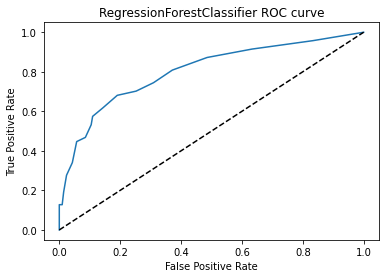

In [119]:
from sklearn.metrics import roc_curve  
probs = rfc.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RegressionForestClassifier ROC curve')
# show the plot
plt.show()

In [0]:
# applying XGB Classifier:

In [121]:
#X =attrition_data.drop(['Attrition','MonthlyRate','ID','HourlyRate','DailyRate','EmployeeNumber','YearsWithCurrManager','YearsAtCompany','YearsInCurrentRole',
                        'TotalWorkingYears','StockOptionLevel','JobInvolvement','JobLevel','EnvironmentSatisfaction'],axis=1)
#y=attrition_data['Attrition']

SyntaxError: ignored

In [0]:
#X =attrition_data.drop(['Attrition','MonthlyRate','ID','HourlyRate','DailyRate','EmployeeNumber','MaritalStatus','OverTime','JobRole','Gender','NumCompaniesWorked',
                        'PercentSalaryHike','PerformanceRating','TrainingTimesLastYear','YearsSinceLastPromotion','EducationField','BusinessTravel'],axis=1)
#y=attrition_data['Attrition']

In [0]:
#Splitting Data into train and test set
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=123)



In [0]:
#Instantiating the classifier and fitting it
xgb_clf= xgb.XGBClassifier(learning_rate=0.01)
xgb_clf.fit(X_train,y_train)

In [0]:
#Applying classifier on Train set
predictions = xgb_clf.predict(X_train)
accuracy = accuracy_score(y_train,predictions)
print(np.round(accuracy*100,2),'%')

In [0]:
#Applying Classifier for test set
predictions = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test,predictions)
print(np.round(accuracy*100,2),'%')

In [0]:
# Printing Confusion Matrix
print(confusion_matrix(y_test, predictions))
print("="*60)
print(classification_report(y_test, predictions))
# plot roc auc

In [0]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, predictions)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))



In [0]:
from sklearn.metrics import roc_curve  
probs = xgb_clf.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
# show the plot
plt.show()

## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  